In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [50]:
data = pd.read_csv("Creditcard_data.csv")

In [51]:
# checking how imbalanced the dataset is
print(data['Class'].value_counts())

Class
0    763
1      9
Name: count, dtype: int64


In [52]:
fraud = data[data["Class"] == 1]
non_fraud = data[data["Class"] == 0]

non_fraud_sample = non_fraud.sample(len(fraud), random_state=42)

balanced_data = pd.concat([fraud, non_fraud_sample]).sample(frac=1, random_state=42)

In [53]:
#Sampling 1: Simple Random Sampling
S1 = balanced_data.sample(frac=0.2, random_state=1)

In [54]:
#Sampling 2: Systematic Sampling
S2 = balanced_data.iloc[::2]

In [55]:
#Sampling 3: Stratified Sampling
S3, _ = train_test_split(
    balanced_data,
    train_size=0.6,
    stratify=balanced_data["Class"],
    random_state=42
)

In [56]:
#Sampling 4: Cluster Sampling
clusters = np.array_split(balanced_data, 5)
S4 = pd.concat(clusters[:2])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [57]:
#Sampling 5: Bootstrap Sampling
S5 = balanced_data.sample(frac=1, replace=True, random_state=42)

In [58]:
samples = [S1, S2, S3, S4, S5]

In [63]:
models = [
    LogisticRegression(max_iter=1000),    # M1
    DecisionTreeClassifier(),             # M2
    RandomForestClassifier(),             # M3
    KNeighborsClassifier(n_neighbors=1),  # M4
    SVC()                                 # M5
]

In [64]:
results = pd.DataFrame(
    index=["M1", "M2", "M3", "M4", "M5"],
    columns=["Sampling1", "Sampling2", "Sampling3", "Sampling4", "Sampling5"]
)

In [65]:
for i, model in enumerate(models):
    for j, sample in enumerate(samples):

        X = sample.drop("Class", axis=1)
        y = sample["Class"]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.3,
            stratify=y,
            random_state=42
        )

        if y_train.nunique() < 2:
            results.iloc[i, j] = None
            continue

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = round(accuracy_score(y_test, preds) * 100, 2)
        results.iloc[i, j] = acc


In [66]:
print(results)

   Sampling1 Sampling2 Sampling3 Sampling4 Sampling5
M1     100.0     66.67     100.0     100.0     100.0
M2      50.0     33.33       0.0     100.0     100.0
M3     100.0     33.33     33.33     66.67     100.0
M4     100.0     33.33       0.0     66.67     83.33
M5     100.0     33.33     33.33     66.67     66.67


<Figure size 1200x600 with 0 Axes>

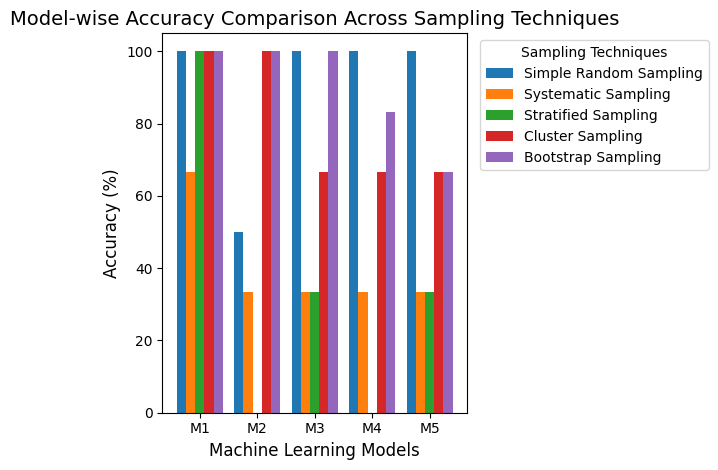

In [70]:
plt.figure(figsize=(12,6))

results.astype(float).plot(
    kind="bar",
    width=0.8
)
plt.title("Model-wise Accuracy Comparison Across Sampling Techniques", fontsize=14)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)

plt.xticks(
    ticks=range(len(results.index)),
    labels=["M1",
            "M2",
            "M3",
            "M4",
            "M5"],
    rotation=0
)
plt.legend(
    title="Sampling Techniques",
    labels=[
        "Simple Random Sampling",
        "Systematic Sampling",
        "Stratified Sampling",
        "Cluster Sampling",
        "Bootstrap Sampling"
    ],
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)
plt.tight_layout()
plt.savefig("model_wise_accuracy.png")
plt.show()

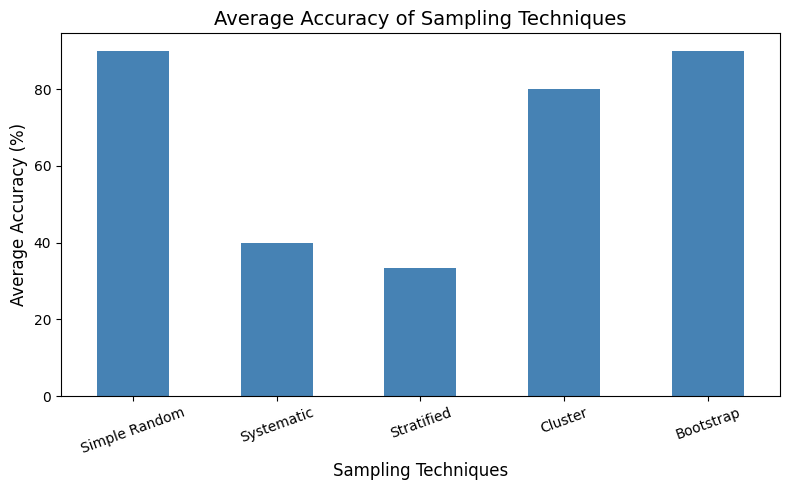

In [69]:
avg_accuracy = results.astype(float).mean()
plt.figure(figsize=(8,5))
avg_accuracy.plot(
    kind="bar",
    color="steelblue"
)
plt.title("Average Accuracy of Sampling Techniques", fontsize=14)
plt.xlabel("Sampling Techniques", fontsize=12)
plt.ylabel("Average Accuracy (%)", fontsize=12)

plt.xticks(
    ticks=range(len(avg_accuracy.index)),
    labels=[
        "Simple Random",
        "Systematic",
        "Stratified",
        "Cluster",
        "Bootstrap"
    ],
    rotation=20
)
plt.tight_layout()
plt.savefig("average_accuracy_sampling.png")
plt.show()
